chromatin seqeunce type and its contacts fractions in aggregates at various resolutions

In [ ]:
#my hic matrix
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
input_path='/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/119_all_bootstrap_1_intra'
hic_matrix = '10kbp_raw_genome_wide_intra_KR_per_chr_ranked.h5'
hic = hm.hiCMatrix(f'{input_path}/{hic_matrix}')

In [ ]:
np.where(entire_matrix_inter.toarray() < thresh_inter, 0, 1)

In [42]:
y = np.random.rand(3,2)

In [43]:
y[0,0] = np.nan

In [46]:
y

array([[       nan, 0.42766907],
       [0.28685984, 0.4876979 ],
       [0.85800343, 0.22424316]])

In [49]:
np.where(y < 0.5, 0, 1)

array([[1, 0],
       [0, 0],
       [1, 0]])

In [481]:
    from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
    rank_n = coo_matrix(hic.matrix)
    rank_n.setdiag(0, k=0)
            

    thresh = np.percentile(rank_n.data, 90)
    arr = np.where(rank_n.toarray() < thresh, 0, 1)

In [482]:
hic.setMatrix(arr, hic.cut_intervals)

In [442]:
#gene files
genome_dir = '/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/genomes/'
gene_file = pd.read_csv(f'{genome_dir}/hsapiens_gene_tss_mapping.csv', sep='\t')

gene_file['feature2'] = ['pc' if x == 'protein_coding' else 'none' for x in gene_file['geneType']]

f_name = 'hsapiens_regulatory_feature.txt'
df_regulatory_ensembl = pd.read_csv(f'{genome_dir}/{f_name}', sep='\t', names=['chrom', "txStart_outer", "txEnd_outer", 'geneType'])


df_regulatory_ensembl['chrom'] = ['chr'+x for x in df_regulatory_ensembl['chrom']]

df_chromatin_type = pd.concat([df_regulatory_ensembl, gene_file])



files_col_names['hsapiens_encodeCcreCombined.bed'] = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'reserved', 'ccre', 'encodeLabel', 'zScore', 'ucscLabel', 'accessionLabel', 'description']



f_name = 'hsapiens_encodeCcreCombined.bed'
df_regulatory_encode = pd.read_csv(f'{genome_dir}/{f_name}', sep='\t', names=['chrom', "txStart_outer", "txEnd_outer", 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'reserved', 'ccre', 'geneType', 'zScore', 'ucscLabel', 'accessionLabel', 'description']
                                  )

df_regulatory_encode = df_regulatory_encode[['chrom', "txStart_outer", "txEnd_outer", 'geneType']]

df_regulatory_encode['feature2'] = 'CRE'

df_chromatin_type = pd.concat([df_chromatin_type, df_regulatory_encode])

genome_segments = ['lncRNA', 'processed_pseudogene', 'protein_coding', 'CTCF Binding Site', 'Enhancer', 'Open chromatin', 'Promoter', 'Promoter Flanking Region', 'TF binding site']



df_p_c = df_chromatin_type[df_chromatin_type['geneType']=='protein_coding']

df_p_c['geneType'] = 'protein_coding_tss'

df_p_c['txEnd_outer'] = df_p_c['txStart_outer']



df_chromatin_type = pd.concat([df_p_c, df_chromatin_type])

In [270]:
df_chromatin_type

chrom  txStart_outer  txEnd_outer                  geneType #geneId  \
0       chr18       35116801     35120999  Promoter Flanking Region     NaN   
1        chr8       37967115     37967453           TF binding site     NaN   
2        chr6       90249202     90257999  Promoter Flanking Region     NaN   
3        chr3       57689401     57689600         CTCF Binding Site     NaN   
4       chr16       55643201     55643800         CTCF Binding Site     NaN   
...       ...            ...          ...                       ...     ...   
926530   chrY       56842374     56842545                      dELS     NaN   
926531   chrY       56844431     56844674                      dELS     NaN   
926532   chrY       56857410     56857680                 CTCF-only     NaN   
926533   chrY       56857917     56858119                 CTCF-only     NaN   
926534   chrY       56868183     56868435                 CTCF-only     NaN   

        gene_order_tss  gene_order_tes geneName feature2  
0                  NaN             NaN      NaN      NaN  
1                  NaN             NaN      NaN      NaN  
2                  NaN             NaN      NaN      NaN  
3                  NaN             NaN      NaN      NaN  
4                  NaN             NaN      NaN      NaN  
...                ...             ...      ...      ...  
926530             NaN             NaN      NaN      CRE  
926531             NaN             NaN      NaN      CRE  
926532             NaN             NaN      NaN      CRE  
926533             NaN             NaN      NaN      CRE  
926534             NaN             NaN      NaN      CRE  

[1609715 rows x 9 columns]

In [385]:
chr_list = ['chr' + str(x) for x in list(range(1,23)) + ['X']]

In [483]:
chr_list = ['chr1']

In [484]:
outfile_path_net = f'{genome_dir}/hic_contacts_files/resolution.txt'
file1 = open(outfile_path_net, "w")
gr_chr = df_chromatin_type.groupby('chrom')

for chrom in gr_chr.groups.keys():
    
    if chrom in chr_list:
        m_start, m_end = hic.getChrBinRange(chrom)
        last_bin_range = hic.cut_intervals[m_end-1][2]
        gr = gr_chr.get_group(chrom)
        gg = gr.groupby('geneType')
        all_features = []
        
        for feature in gg.groups.keys():
            feature_list = []
            df_features = gg.get_group(feature)
            
            duplicate_bins = []
            for tss_start_x, tss_end_x in zip(df_features['txStart_outer'], df_features['txEnd_outer']):
                
                if (tss_start_x - last_bin_range) >= 0:
                    tss_start_x = last_bin_range - 1
                    

                if (tss_end_x - last_bin_range) >= 0:
                    tss_end_x = last_bin_range - 1
                 
                (bin_start, bin_end) = hic.getRegionBinRange(chrom, min(tss_start_x, tss_end_x), max(tss_start_x, tss_end_x) )

                for i in range(bin_start, bin_end+1):
                    feature_list.append(i)

            gene_range_matrix = hic.matrix.sum(axis=1)[list(set(feature_list))]
            file1.write("%s\t" %chrom)
            file1.write("%s\t" %feature)
            file1.write("%s\t" %gene_range_matrix.sum())
            file1.write("%s\n" %(gene_range_matrix.shape[0]))
            all_features.extend(feature_list)
        no_features_list = [x for x in range(m_start,m_end) if x not in all_features]
        gene_range_matrix = hic.matrix.sum(axis=1)[no_features_list]
        file1.write("%s\t" %chrom)
        file1.write("%s\t" %'no_feature')
        file1.write("%s\t" %gene_range_matrix.sum())
        file1.write("%s\n" %(gene_range_matrix.shape[0]))
        file1.write("%s\t" %chrom)
        file1.write("%s\t" %'all_bins')
        file1.write("%s\t" %hic.matrix[m_start : m_end , :][:, m_start : m_end ].sum())
        file1.write("%s\n" %(m_end-m_start+1))

file1.close()

In [354]:
outfile_path_net = f'{genome_dir}/hic_contacts_files/{resolution}_self_feature_pairs.txt'
file1 = open(outfile_path_net, "w")
gr_chr = df_chromatin_type.groupby('chrom')

for chrom in gr_chr.groups.keys():
    
    if chrom in chr_list:
        m_start, m_end = hic.getChrBinRange(chrom)
        last_bin_range = hic.cut_intervals[m_end-1][2]
        gr = gr_chr.get_group(chrom)
        gg = gr.groupby('geneType')
        all_features = []
        
        for feature in gg.groups.keys():
            feature_list = []
            df_features = gg.get_group(feature)
            
            duplicate_bins = []
            for tss_start_x, tss_end_x in zip(df_features['txStart_outer'], df_features['txEnd_outer']):
                
                if (tss_start_x - last_bin_range) >= 0:
                    tss_start_x = last_bin_range - 1
                    

                if (tss_end_x - last_bin_range) >= 0:
                    tss_end_x = last_bin_range - 1
                 
                (bin_start, bin_end) = hic.getRegionBinRange(chrom, min(tss_start_x, tss_end_x), max(tss_start_x, tss_end_x) )

                for i in range(bin_start, bin_end+1):
                    feature_list.append(i)



            gene_range_matrix = hic.matrix[list(set(feature_list)), :][:, list(set(feature_list))]
            file1.write("%s\t" %chrom)
            file1.write("%s\t" %feature)
            file1.write("%s\t" %gene_range_matrix.sum())
            file1.write("%s\n" %(gene_range_matrix.shape[0]*gene_range_matrix.shape[0]))
            all_features.extend(feature_list)
        no_features_list = [x for x in range(m_start,m_end) if x not in all_features]
        gene_range_matrix = hic.matrix[no_features_list, :][:, no_features_list]
        file1.write("%s\t" %chrom)
        file1.write("%s\t" %'no_feature')
        file1.write("%s\t" %gene_range_matrix.sum())
        file1.write("%s\n" %(gene_range_matrix.shape[0]*gene_range_matrix.shape[0]))
        file1.write("%s\t" %chrom)
        file1.write("%s\t" %'all_bins')
        file1.write("%s\t" %hic.matrix[m_start : m_end , :][:, m_start : m_end ].sum())
        file1.write("%s\n" %((m_end-m_start+1) * (m_end-m_start+1)))

file1.close()

In [333]:
outfile_path_net = f'{genome_dir}/hic_contacts_files/hetro_feature_pairs.txt'
file1 = open(outfile_path_net, "w")
gr_chr = df_chromatin_type.groupby('feature2')

all_features = []
for feature in ['CRE']:
    df_chr = gr_chr.get_group(feature)
    gr = df_chr.groupby('chrom')
    
    for chrom in gr.groups.keys():
        if chrom in chr_list:
            feature_list_1 = []
            m_start, m_end = hic.getChrBinRange(chrom)
            last_bin_range = hic.cut_intervals[m_end-1][2]
            df_features = gr.get_group(chrom)
            
            duplicate_bins = []
            for tss_start_x, tss_end_x in zip(df_features['txStart_outer'], df_features['txEnd_outer']):
                
                if (tss_start_x - last_bin_range) >= 0:
                    tss_start_x = last_bin_range - 1
                    

                if (tss_end_x - last_bin_range) >= 0:
                    tss_end_x = last_bin_range - 1
                 
                (bin_start, bin_end) = hic.getRegionBinRange(chrom, min(tss_start_x, tss_end_x), max(tss_start_x, tss_end_x) )

                for i in range(bin_start, bin_end+1):
                    feature_list_1.append(i)
    all_features.extend(feature_list)
    
for feature in ['pc']:
    df_chr = gr_chr.get_group(feature)
    gr = df_chr.groupby('chrom')
    
    for chrom in gr.groups.keys():
        feature_list_2 = []
        if chrom in chr_list:
            m_start, m_end = hic.getChrBinRange(chrom)
            last_bin_range = hic.cut_intervals[m_end-1][2]
            df_features = gr.get_group(chrom)
            
            duplicate_bins = []
            for tss_start_x, tss_end_x in zip(df_features['txStart_outer'], df_features['txEnd_outer']):
                
                if (tss_start_x - last_bin_range) >= 0:
                    tss_start_x = last_bin_range - 1
                    

                if (tss_end_x - last_bin_range) >= 0:
                    tss_end_x = last_bin_range - 1
                 
                (bin_start, bin_end) = hic.getRegionBinRange(chrom, min(tss_start_x, tss_end_x), max(tss_start_x, tss_end_x) )

                for i in range(bin_start, bin_end+1):
                    feature_list_2.append(i)
        all_features.extend(feature_list)
    

        gene_range_matrix = hic.matrix[list(set(feature_list_1)), :][:, list(set(feature_list_2))]
        file1.write("%s\t" %feature)
        file1.write("%s\t" %gene_range_matrix.sum())
        file1.write("%s\n" %(gene_range_matrix.shape[0]*gene_range_matrix.shape[1]))

        file1.write("%s\t" %'all_bins')
        file1.write("%s\t" %hic.matrix.sum())
        file1.write("%s\n" %(hic.matrix.shape[0]*hic.matrix.shape[0]))

file1.close()

In [2]:
import pandas as pd
import seaborn as sns

In [42]:
df_list = []
for resolution in [500]:
    file_path = '/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/genomes/hic_contacts_files'
    df = pd.read_csv(f'{file_path}/40_contacts.txt', names=['chrom','features', 'contacts', 'number_of_bins'], sep='\t')
    df['resolution'] = resolution 
    df_list.append(df)
    

In [43]:
df = pd.concat(df_list)

In [44]:
df['avg_contacts'] = df['contacts'] / df['number_of_bins']

In [ ]:
df = df[df['number_of_bins'] >=10000]

In [27]:
df

chrom                            features  contacts  number_of_bins  \
0    chr1                   CTCF Binding Site   2814998        23367556   
1    chr1                           CTCF-only    777452         7772944   
2    chr1                       DNase-H3K4me3    167588         1664100   
3    chr1                            Enhancer   1922222        17522596   
4    chr1                     IG_V_pseudogene         0               1   
..    ...                                 ...       ...             ...   
749  chrX  transcribed_unprocessed_pseudogene       314            1225   
750  chrX                  unitary_pseudogene         4              25   
751  chrX              unprocessed_pseudogene      1908           10609   
752  chrX                          no_feature     11354           49729   
753  chrX                            all_bins   1628812        15233409   

     resolution  avg_contacts  
0           500      0.120466  
1           500      0.100020  
2           500      0.100708  
3           500      0.109700  
4           500      0.000000  
..          ...           ...  
749         500      0.256327  
750         500      0.160000  
751         500      0.179847  
752         500      0.228317  
753         500      0.106924  

[754 rows x 6 columns]

[Text(0, 0, 'CTCF Binding Site'),
 Text(1, 0, 'CTCF-only'),
 Text(2, 0, 'DNase-H3K4me3'),
 Text(3, 0, 'Enhancer'),
 Text(4, 0, 'Open chromatin'),
 Text(5, 0, 'PLS'),
 Text(6, 0, 'Promoter'),
 Text(7, 0, 'Promoter Flanking Region'),
 Text(8, 0, 'TF binding site'),
 Text(9, 0, 'dELS'),
 Text(10, 0, 'lncRNA'),
 Text(11, 0, 'pELS'),
 Text(12, 0, 'processed_pseudogene'),
 Text(13, 0, 'protein_coding'),
 Text(14, 0, 'protein_coding_tss'),
 Text(15, 0, 'no_feature'),
 Text(16, 0, 'all_bins')]

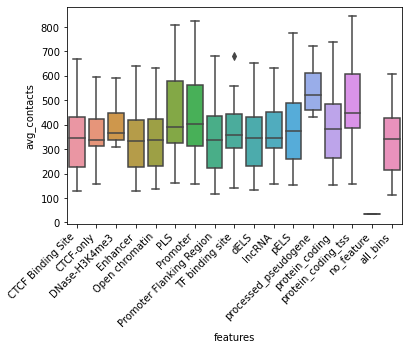

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
chart = sns.boxplot(data=df[df['number_of_bins'] >=500], x='features', y='avg_contacts')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'CTCF Binding Site'),
 Text(1, 0, 'CTCF-only'),
 Text(2, 0, 'DNase-H3K4me3'),
 Text(3, 0, 'Enhancer'),
 Text(4, 0, 'Open chromatin'),
 Text(5, 0, 'PLS'),
 Text(6, 0, 'Promoter'),
 Text(7, 0, 'Promoter Flanking Region'),
 Text(8, 0, 'TF binding site'),
 Text(9, 0, 'dELS'),
 Text(10, 0, 'lncRNA'),
 Text(11, 0, 'pELS'),
 Text(12, 0, 'processed_pseudogene'),
 Text(13, 0, 'protein_coding'),
 Text(14, 0, 'protein_coding_tss'),
 Text(15, 0, 'no_feature'),
 Text(16, 0, 'all_bins')]

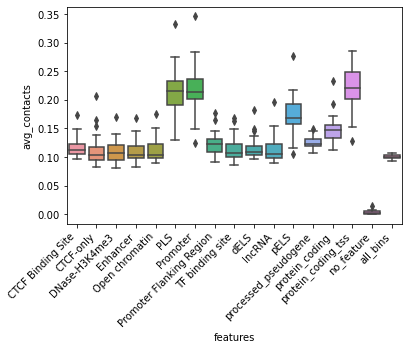

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
chart = sns.boxplot(data=df[df['number_of_bins'] >=100000], x='features', y='avg_contacts')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'CTCF Binding Site'),
 Text(1, 0, 'CTCF-only'),
 Text(2, 0, 'DNase-H3K4me3'),
 Text(3, 0, 'Enhancer'),
 Text(4, 0, 'Open chromatin'),
 Text(5, 0, 'PLS'),
 Text(6, 0, 'Promoter'),
 Text(7, 0, 'Promoter Flanking Region'),
 Text(8, 0, 'TF binding site'),
 Text(9, 0, 'dELS'),
 Text(10, 0, 'lncRNA'),
 Text(11, 0, 'miRNA'),
 Text(12, 0, 'misc_RNA'),
 Text(13, 0, 'pELS'),
 Text(14, 0, 'processed_pseudogene'),
 Text(15, 0, 'protein_coding'),
 Text(16, 0, 'protein_coding_tss'),
 Text(17, 0, 'snRNA'),
 Text(18, 0, 'transcribed_processed_pseudogene'),
 Text(19, 0, 'transcribed_unprocessed_pseudogene'),
 Text(20, 0, 'unprocessed_pseudogene'),
 Text(21, 0, 'no_feature'),
 Text(22, 0, 'all_bins'),
 Text(23, 0, 'TEC'),
 Text(24, 0, 'transcribed_unitary_pseudogene')]

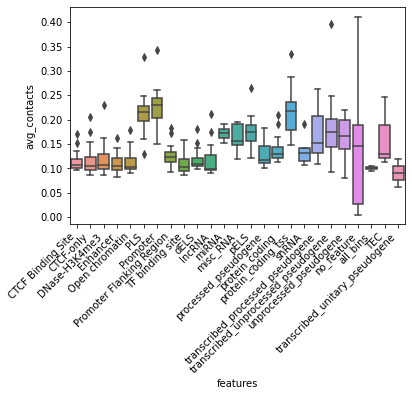

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
chart = sns.boxplot(data=df[df['number_of_bins'] >=10000], x='features', y='avg_contacts')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [21]:
df[df['number_of_bins'] >=1000000].groupby('features')['avg_contacts'].mean()

features
CTCF Binding Site           0.113090
CTCF-only                   0.101672
DNase-H3K4me3               0.091808
Enhancer                    0.108401
Open chromatin              0.108631
PLS                         0.226923
Promoter                    0.213187
Promoter Flanking Region    0.121212
TF binding site             0.106276
all_bins                    0.100542
dELS                        0.112123
lncRNA                      0.098603
pELS                        0.168081
protein_coding              0.147402
protein_coding_tss          0.228783
Name: avg_contacts, dtype: float64

In [364]:
df.groupby('features')['avg_contacts'].mean()

features
CTCF Binding Site           0.116061
CTCF-only                   0.112936
DNase-H3K4me3               0.116360
Enhancer                    0.114185
Open chromatin              0.115663
PLS                         0.180009
Promoter                    0.181357
Promoter Flanking Region    0.117887
TEC                         0.113512
TF binding site             0.117598
dELS                        0.116996
lncRNA                      0.117612
miRNA                       0.203833
misc_RNA                    0.190446
pELS                        0.148825
processed_pseudogene        0.129014
protein_coding              0.144739
snRNA                       0.195101
unprocessed_pseudogene      0.204646
Name: avg_contacts, dtype: float64

In [343]:
df

features  contacts  number_of_bins  resolution  avg_contacts
0        pc   3223774       524704853         500      0.006144
1  all_bins   4730854       918877969         500      0.005149

In [71]:
df['gene_fraction'] = df['number_of_gene'] / df['all_bins']

In [65]:
df['%gene_pairs'] = df['gene_pairs'] / df['number_of_gene']

In [66]:
df['%all_pairs'] = df['all_pairs'] / df['all_bins']

In [77]:
df['non_gene_pairs'] = df['all_pairs'] - df['gene_pairs']

In [78]:
df['non_gene_bins'] = df['all_bins'] - df['number_of_gene']

In [79]:
df['%non_gene_pairs'] = df['non_gene_pairs'] / df['non_gene_bins'] 

In [83]:
df['%non_gene_pairs']+ df['%gene_pairs']

0    2.596096e+08
0    2.318471e+07
0    4.495751e+06
0    1.420722e+05
dtype: float64

In [90]:
df['ratio'] =  df['%gene_pairs'] / df['%non_gene_pairs']

In [92]:
df['%gene_pairs'] - df['%non_gene_pairs']

0   -1.925991e+08
0   -1.131984e+07
0   -1.554528e+06
0    1.676228e+04
dtype: float64

<AxesSubplot:xlabel='resolution', ylabel='ratio'>

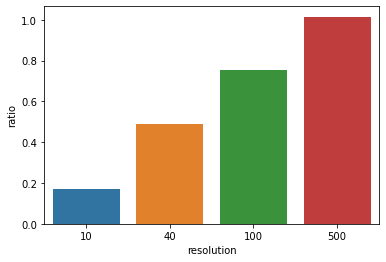

In [88]:
sns.barplot(data=df, x='resolution', y='ratio')

<AxesSubplot:xlabel='resolution', ylabel='%non_gene_pairs'>

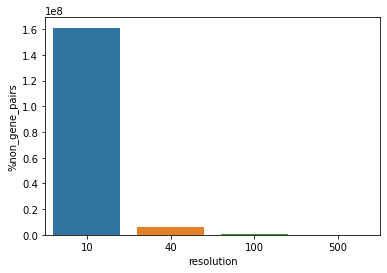

In [69]:
sns.barplot(data=df, x='resolution', y='%non_gene_pairs')

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
df_list = []
df = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/metadata/accessions_drosophila.csv', header=0)

In [20]:
df['species'] = 0
df_list.append(df)

In [21]:
df = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/metadata/accessions_mouse.csv', header=0)


In [22]:
df['species'] = 1
df_list.append(df)

In [23]:
df = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/metadata/accessions_human.csv', header=0, skiprows=1)


In [24]:
df['species'] = 2
df_list.append(df)

In [39]:
df = pd.concat(df_list)

In [40]:
df

Run          ReleaseDate             LoadDate       spots  \
0     SRR9133814  2020-08-20 16:37:18  2019-05-28 11:26:48  24768323.0   
1     SRR9133815  2020-08-20 16:37:18  2019-05-28 11:14:00    974022.0   
2     SRR9133816  2020-08-20 16:37:18  2019-05-28 11:18:12  10747299.0   
3     SRR9133817  2020-08-20 16:37:18  2019-05-28 11:14:06   1455943.0   
4     SRR9133818  2020-08-20 16:37:18  2019-05-28 11:33:44  47917420.0   
...          ...                  ...                  ...         ...   
4177  SRR1658828  2014-12-11 12:31:21  2014-11-21 07:20:13    750627.0   
4178  SRR1658829  2014-12-11 12:31:21  2014-11-21 07:22:16    929394.0   
4179  SRR1658830  2014-12-11 12:31:21  2014-11-21 01:14:11    654578.0   
4180  SRR1658831  2014-12-11 12:31:21  2014-11-21 01:16:24   1130277.0   
4181  SRR1658832  2014-12-11 12:31:21  2014-11-21 01:43:06    687350.0   

             bases  spots_with_mates  avgLength  size_MB AssemblyName  \
0     7.480034e+09        24768323.0      302.0   2824.0          NaN   
1     2.590899e+08          974022.0      266.0    137.0          NaN   
2     3.245684e+09        10747299.0      302.0   1252.0          NaN   
3     2.183914e+08         1455943.0      150.0     80.0          NaN   
4     1.447106e+10        47917420.0      302.0   5763.0          NaN   
...            ...               ...        ...      ...          ...   
4177  1.426191e+08          750627.0      190.0     74.0          NaN   
4178  1.765849e+08          929394.0      190.0     93.0          NaN   
4179  1.243698e+08          654578.0      190.0     65.0          NaN   
4180  2.147526e+08         1130277.0      190.0    109.0          NaN   
4181  1.374700e+08          687350.0      200.0     76.0          NaN   

                                          download_path  ... Analyte_Type  \
0     https://sra-download.ncbi.nlm.nih.gov/traces/s...  ...          NaN   
1     https://sra-download.ncbi.nlm.nih.gov/traces/s...  ...          NaN   
2     https://sra-download.ncbi.nlm.nih.gov/traces/s...  ...          NaN   
3     https://sra-download.ncbi.nlm.nih.gov/traces/s...  ...          NaN   
4     https://sra-download.ncbi.nlm.nih.gov/traces/s...  ...          NaN   
...                                                 ...  ...          ...   
4177  https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...  ...          NaN   
4178  https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...  ...          NaN   
4179  https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...  ...          NaN   
4180  https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...  ...          NaN   
4181  https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...  ...          NaN   

     Histological_Type Body_Site CenterName Submission dbgap_study_accession  \
0                  NaN       NaN        GEO  SRA890750                   NaN   
1                  NaN       NaN        GEO  SRA890750                   NaN   
2                  NaN       NaN        GEO  SRA890750                   NaN   
3                  NaN       NaN        GEO  SRA890750                   NaN   
4                  NaN       NaN        GEO  SRA890750                   NaN   
...                ...       ...        ...        ...                   ...   
4177               NaN       NaN        GEO  SRA204078                   NaN   
4178               NaN       NaN        GEO  SRA204078                   NaN   
4179               NaN       NaN        GEO  SRA204078                   NaN   
4180               NaN       NaN        GEO  SRA204078                   NaN   
4181               NaN       NaN        GEO  SRA204078                   NaN   

      Consent                           RunHash  \
0      public  AEFD41120F2FCBDDA010355D5CFAA514   
1      public  8BFDD8AA13168BF5498A73D0A5FE0855   
2      public  9A90F8179C3B1CEAA91A55F92C873D66   
3      public  44CEDA1F21A923C8617BF528E4CE2127   
4      public  F9A4A458753400698099A852F5B153EB   
...       ...                               ...   
4177

In [36]:
df.groupby(['species','SRAStudy']).count().reset_index()

species   SRAStudy  Run  ReleaseDate  LoadDate  spots  bases  \
0          0  ERP016479   17           17        17     17     17   
1          0  ERP112723   12           12        12     12     12   
2          0  ERP112882   38           38        38     38     38   
3          0  ERP122732   76           76        76     76     76   
4          0  SRP050096   17           17        17     17     17   
..       ...        ...  ...          ...       ...    ...    ...   
331        2  SRP264796    3            3         3      3      3   
332        2  SRP267107   36           36        36     36     36   
333        2  SRP271101    5            5         5      5      5   
334        2  SRP272124    1            1         1      1      1   
335        2  SRP274139    3            3         3      3      3   

     spots_with_mates  avgLength  size_MB  ...  Affection_Status  \
0                  17         17       17  ...                 0   
1                  12         12       12  ...                 0   
2                  38         38       38  ...                 0   
3                  76         76       76  ...                 0   
4                  17         17       17  ...                 0   
..                ...        ...      ...  ...               ...   
331                 3          3        3  ...                 0   
332                36         36       36  ...                 0   
333                 5          5        5  ...                 0   
334                 1          1        1  ...                 0   
335                 3          3        3  ...                 0   

     Analyte_Type  Histological_Type  Body_Site  CenterName  Submission  \
0               0                  0          0          17          17   
1               0                  0          0          12          12   
2               0                  0          0          38          38   
3               0                  0          0          76          76   
4               0                  0          0          17          17   
..            ...                ...        ...         ...         ...   
331             0                  0          0           3           3   
332             0                  0          0          36          36   
333             0                  0          0           5           5   
334             0                  0          0           1           1   
335             0                  0          0           3           3   

     dbgap_study_accession  Consent  RunHash  ReadHash  
0                        0       17       17        17  
1                        0       12       12        12  
2                        0       38       38        38  
3                        0       76       76        76  
4                        0       17       17        17  
..                     ...      ...      ...       ...  
331                      0        3        3         3  
332                      0       36       36        36  
333                      0        5        5         5  
334                      0        1        1         1  
335                      0        3        3         3  

[336 rows x 48 columns]

In [29]:
df = df.groupby(['species','SRAStudy']).count().reset_index()

<AxesSubplot:xlabel='species', ylabel='Run'>

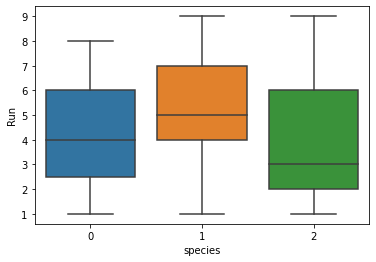

In [32]:
sns.boxplot(data = df[df['Run'] < 10], x='species', y='Run')

In [38]:
df['Run'].max()

'SRR9993986'

In [ ]:
import sys
sys.path.append('/grid/gillis/data/nfox/hi_c_data_processing/software)

import access
import os
import pandas as pd

PATH_PREFIX='/grid/gillis/data/nfox/hi_c_data_processing/data_human'
aggregate_excludes = []
for project in [p for p in os.listdir(PATH_PREFIX) if p[1:2] == 'RP']:
    aggregate_file = os.path.join(PATH_PREFIX, project, 'aggregate.hdf5')
    if os.path.exists(aggregate_file):
         try:
             # The exact network doesn't matter as long as all of them
             # have aggregated the same set of Runs, which they should have.
             # You could iterate over all networks in the aggregate to verify
             # that they all have identical exclude lists.
             aggregate_excludes.append(access.get_exclude(aggregate_file, '1bp_raw'))
         except ValueError as e:
             print(f'Failed to get exclude data from {project}/aggregate.hdf5 : ValueError({e})')
exclude = pd.concat([pd.DataFrame(agg_exc) for agg_exc in aggregate_excludes])